# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

### Desafio 1

Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [2]:
import pandas as pd
vendas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")
vendas["data_envio"] = pd.to_datetime(vendas["data_envio"], format="%Y-%m-%d") 

vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [3]:
# Criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[["data_pedido", "lucro"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido e agrupando os dados por ano
df_lucro_ano["ano"] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels= "data_pedido",axis=1,inplace = True)

df_lucro_ano = df_lucro_ano.groupby("ano").aggregate("sum")

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


In [4]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\1314043301.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_lucro_ano,x = df_lucro_ano.index,y="lucro", palette =  cores)


[]

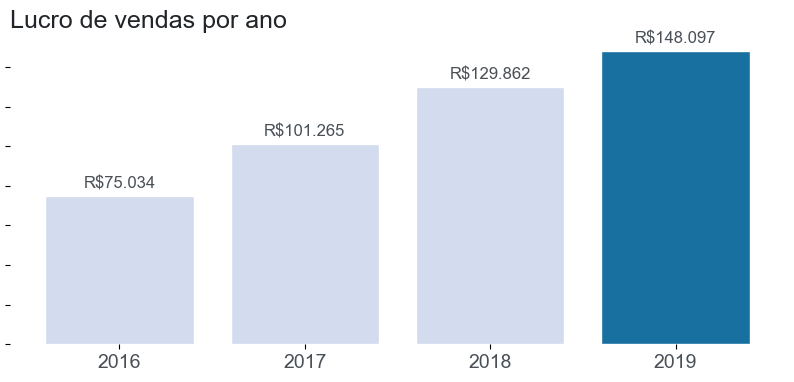

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style = "white")
cores = []
for ano in df_lucro_ano.index:
    if df_lucro_ano.loc[ano,"lucro"] == df_lucro_ano.lucro.max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

ax = sns.barplot(data = df_lucro_ano,x = df_lucro_ano.index,y="lucro", palette =  cores)

ax.set_title("Lucro de vendas por ano",loc = "left",fontsize = 18, color = CINZA1,)
ax.set_xlabel("")
ax.set_ylabel("")

ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
sns.despine(left= True,bottom=True)

ax.set_yticklabels([])

for i, valor in enumerate(df_lucro_ano["lucro"]):
    qtd = f"R${valor:,.0f}".replace(",",".")
    offset = 6e3
    ax.text(i, valor + offset,qtd,color = CINZA2, fontsize = 12,ha= "center",va = "center")

ax.plot()

### Desafio 2

Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

<>:42: SyntaxWarning: invalid escape sequence '\ '
<>:42: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\1382712677.py:42: SyntaxWarning: invalid escape sequence '\ '
  'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\1382712677.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  AX = sns.barplot(data=top_10,x = "vendas",y=top_10.index,palette=cores)


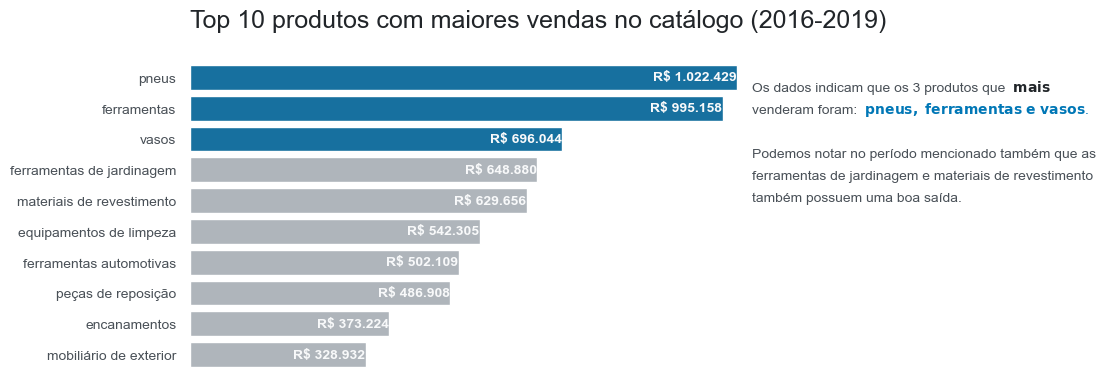

In [6]:
# Criando um df com os dados desejados
top_vendas = vendas.copy()
top_vendas = top_vendas[["tipo_produto","vendas"]]

# Agrupando os dados por tipo_produto, ordenando de maneira crescente pelo vendas e selecionando os 7 primeiros

top_vendas = top_vendas.groupby(["tipo_produto"]).agg("sum").sort_values("vendas",ascending=False)
top_vendas

top_10 = top_vendas[:10]

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style="white")

# Definindo as cores do gráfico
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]


# Gerando o gráfico de colunas 

AX = sns.barplot(data=top_10,x = "vendas",y=top_10.index,palette=cores)

## Personalizando o gráfico
ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# # Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')  
    offset = 1e3  # offset de 1.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n' 
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

## Aula 02 - Agrupando dados

### Desafio 1

Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [7]:
vendas_co = vendas.copy()
vendas_co = vendas_co[["data_pedido","regiao","estado","vendas"]]
vendas_co['ano'] = vendas_co.data_pedido.dt.year
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"],axis = 1, inplace = True)

vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [8]:

vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado, 
                         values = vendas_co.vendas, aggfunc = "sum")

vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


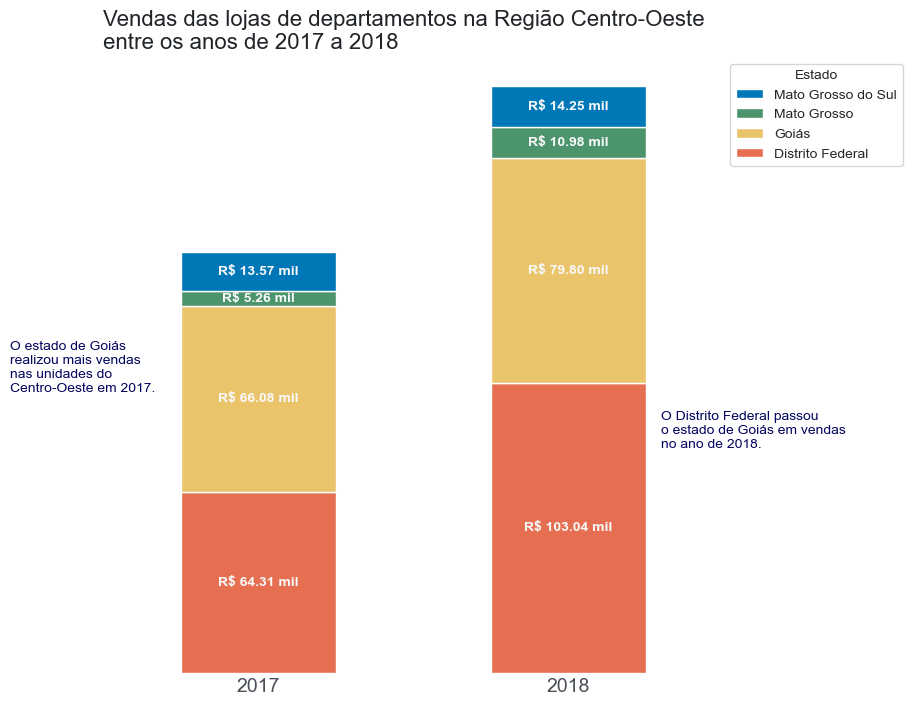

In [9]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas 
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018', 
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores 
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()

### Desafio 2

Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [10]:
df_div_envio = vendas.copy()
df_div_envio = df_div_envio[["departamento", "modo_envio"]]
df_div_envio_normalizado = pd.crosstab(index = df_div_envio.departamento,columns=df_div_envio.modo_envio,normalize = "index")
df_div_envio_normalizado

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [11]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma 
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                    units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\698182630.py:18: SyntaxWarning: invalid escape sequence '\ '
  texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)


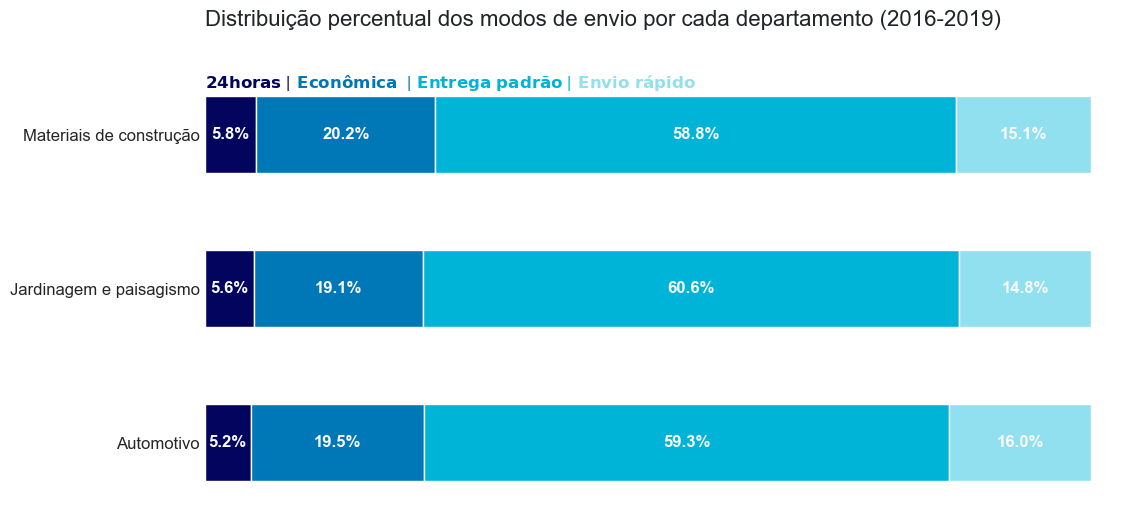

In [12]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas 
ax = df_div_envio_normalizado.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n", 
            fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()

## Aula 03 - Séries de tempo

### Desafio 1

Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

In [13]:
# Criando um df com os dados desejados
df_go = vendas.copy()
# Criando uma tabela cruzada (crosstab) com os valores de venda por dia por região
df_go = df_go.query('estado == "Goiás"')[["data_pedido", "vendas"]]

# Agrupando as vendas por final do semestre (2Q)
df_go.set_index("data_pedido", inplace = True)
df_go = df_go.resample("2Q", closed="left").agg("sum")
df_go = df_go.reset_index()
df_go.head()

C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\3758765335.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_go = df_go.resample("2Q", closed="left").agg("sum")


,data_pedido,vendas
0,2016-06-30,20623.67
1,2016-12-31,19499.62
2,2017-06-30,2648.18
3,2017-12-31,63430.15
4,2018-06-30,36747.97


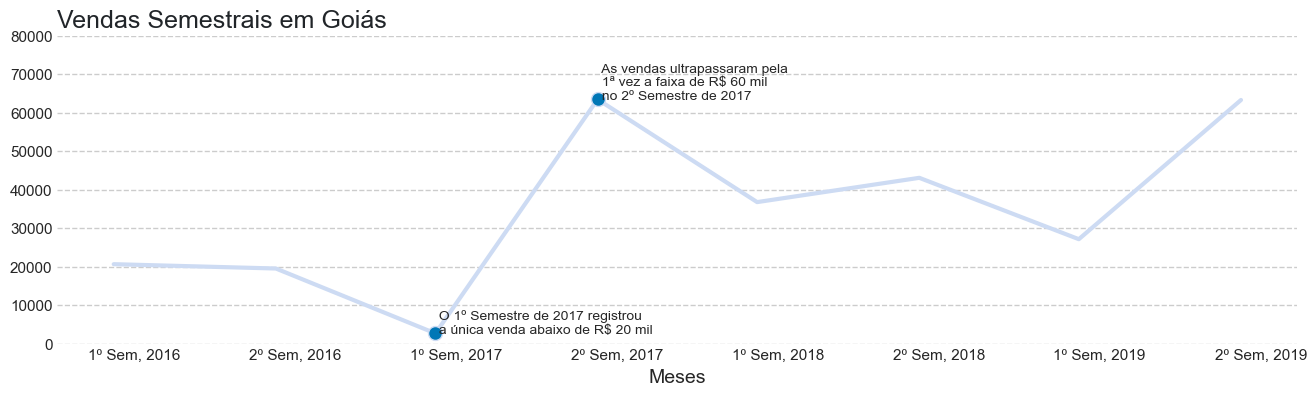

In [14]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(16,4))
venda_min = df_go.vendas.min()
venda_max = df_go.vendas.max()
valores = df_go.vendas.values

# Gráfico de linha
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

ax.plot(df_go["data_pedido"],df_go["vendas"],lw = 3,color = AZUL5,marker = "o",markersize = 10,markerfacecolor = AZUL2, markevery = pontos_a_marcar)
## Personalizando o gráfico
ax.set_title('Vendas Semestrais em Goiás', fontsize = 18, color = CINZA1, loc='left')
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)


# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 0.8e5)

# Definindo o intervalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017", 
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

# Escrevendo texto nos pontos de destaque
for x, y in zip(df_go.data_pedido, df_go.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e1, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 20 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e1, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 60 mil \n no 2º Semestre de 2017", fontsize = 10)


plt.show()


### Desafio 2

 Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [15]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]

In [16]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estados_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc="sum")

# Agrupando os lucros por ano
df_estados_ne = df_estados_ne.resample('Y').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne

C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\853041588.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_estados_ne = df_estados_ne.resample('Y').agg('sum')


estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [17]:
# Importando a biblioteca
import plotly.express as px

# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estados_ne, x=df_estados_ne.index, y=df_estados_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estados_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

## Aula 04 - Distribuindo dados

### Desafio 1

Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

Dica 1: Para desenhar os gráficos separados, utilize a mesma ideia que executamos no gráfico de barras empilhadas: fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(largura, altura)).

Dica 2: E, para desenhar 2 ou mais gráficos no seaborn, precisamos passar um parâmetro ax para a função de desenho do visual, por exemplo, sns.barplot(ax = axs[0], …)

In [18]:
import pandas as pd

df_cidade_alegre = pd.read_csv("pop_idade.csv")
df_cidade_alegre

,idade
0,39
1,33
2,41
3,50
4,32
...,...
495,40
496,24
497,33
498,26


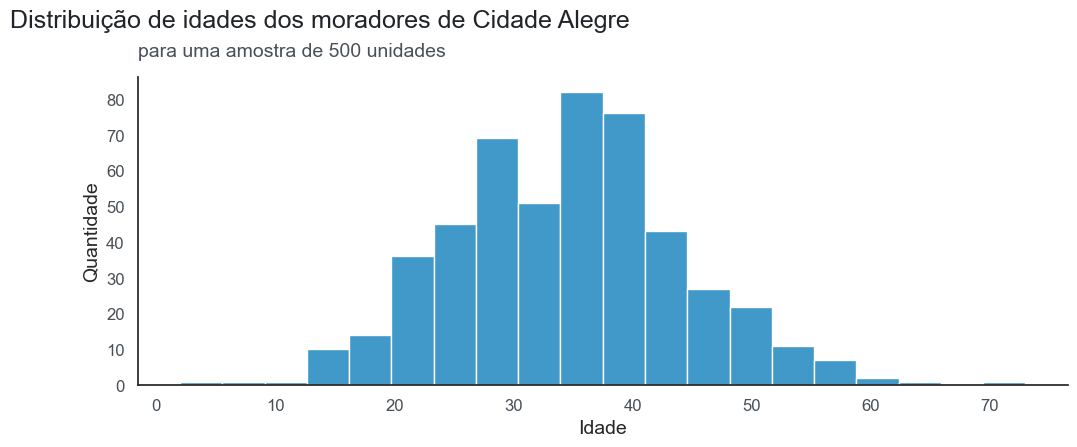

In [19]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style="white")

# Gerando o histograma sem estimativa de densidade
# ax = sns.histplot(data = vol_amaciante,x = "Volume",binwidth = 0.1, color = AZUL2)  # ajustando o intervalo pelo largura dos bins
ax = sns.histplot(data = df_cidade_alegre,x = "idade",bins = 20, color = AZUL2)   # ajustando o intervalo pelo quantidade de bins

# # Personalizando o gráfico
plt.suptitle('Distribuição de idades dos moradores de Cidade Alegre', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 500 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

plt.show()

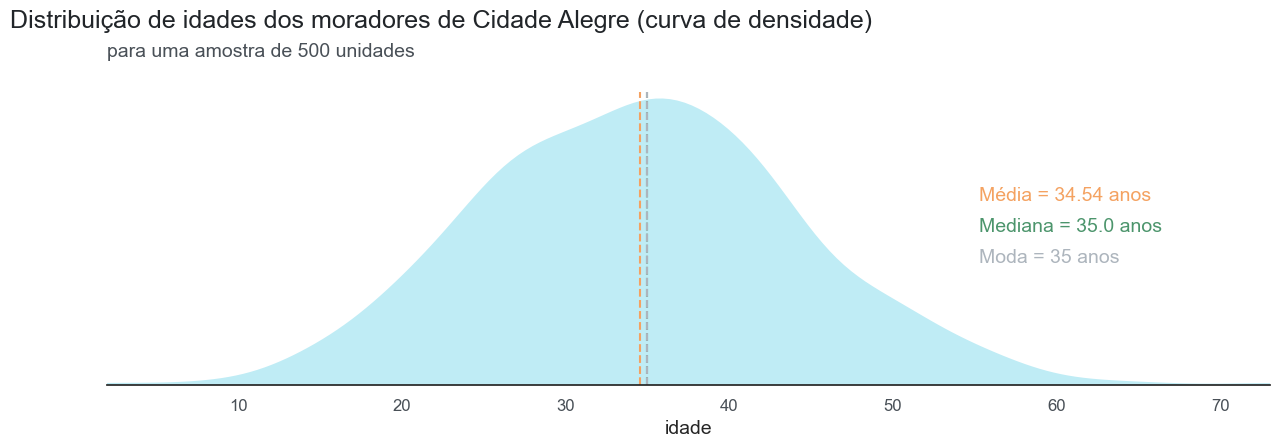

In [20]:
# Gerando a função que desenha a Densidade
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
def grafico_densidade():
    # Área do gráfico e tema da visualização
    fig, ax = plt.subplots(figsize=(15,4))
    sns.set_theme(style="white")

    # Gerando a curva de densidade
    ax = sns.kdeplot(data = df_cidade_alegre,x = "idade", color = AZUL3,lw = 0, fill = True)

    # # Personalizando o gráfico
    plt.suptitle('Distribuição de idades dos moradores de Cidade Alegre (curva de densidade)', size=18, color=CINZA1, ha = 'right', x = 0.635, y = 1.05)
    plt.title('para uma amostra de 500 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
    ax.set_xlabel('idade', fontsize = 14)
    ax.set_ylabel('Densidade', fontsize = 14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    ax.set_xlim(df_cidade_alegre.idade.min(), df_cidade_alegre.idade.max())
    sns.despine(left = True, top = True)

    return ax

    # Chamando a função que gera o gráfico de densidade
ax = grafico_densidade()

## Personalizando o gráfico
ax.set_ylabel('')
ax.set_yticklabels([])

# Gerando as linhas de média, mediana e moda
estat = df_cidade_alegre.idade.mean(),df_cidade_alegre.idade.median(),df_cidade_alegre.idade.mode()[0]
desc = ["Média", "Mediana", "Moda"]


# Definindo as cores de cada estatística descritiva
cores = [LARANJA1, VERDE1, CINZA3]

# gerando 1 ou mais linhas na vertical a partir de um valor de x
ax.vlines(x = estat,ymin = 0,ymax = 0.04,colors = cores, linestyles = "--")

# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} anos', fontsize=14, color = cores[i], transform=ax.transAxes)

fig = ax.get_figure()

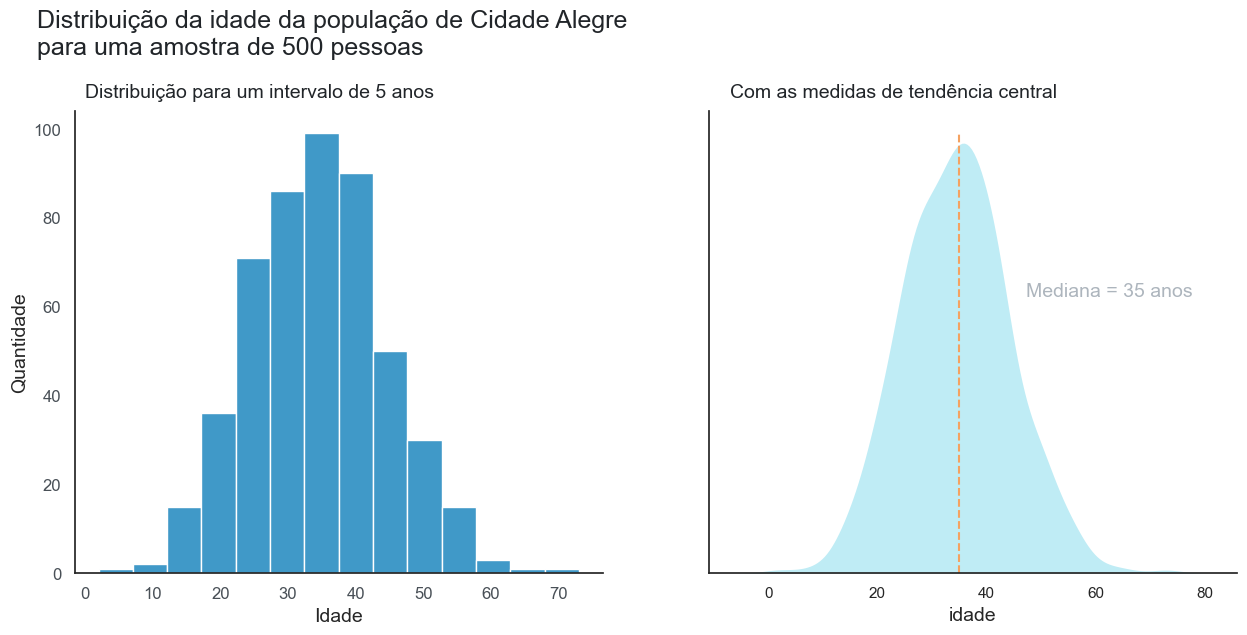

In [21]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas", 
                fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")   

# Gerando o histograma sem estimativa de densidade
# ax[0] = sns.histplot(data = vol_amaciante,x = "Volume",binwidth = 0.1, color = AZUL2)  # ajustando o intervalo pelo largura dos bins
sns.histplot(ax = axs[0],data = df_cidade_alegre,x = "idade",binwidth = 5, color = AZUL2)   # ajustando o intervalo pelo quantidade de bins

axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()


# Gerando a curva de densidade
sns.kdeplot(ax = axs[1],data = df_cidade_alegre,x = "idade", color = AZUL3,lw = 0, fill = True)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('idade', fontsize = 14)
axs[1].set_ylabel('', fontsize = 14)
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando 1 ou mais linhas na vertical a partir de um valor de x
axs[1].vlines(x = df_cidade_alegre.idade.median(),ymin = 0,ymax = 0.04,colors = cores, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(df_cidade_alegre.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()

### Desafio 2

Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

Dica: Para conseguir definir os limites superiores e inferiores, calcule o intervalo interquartil dos dados e, logo em seguida, cada um dos limites, seguindo as fórmulas do Faça como eu fiz: elementos de um boxplot.

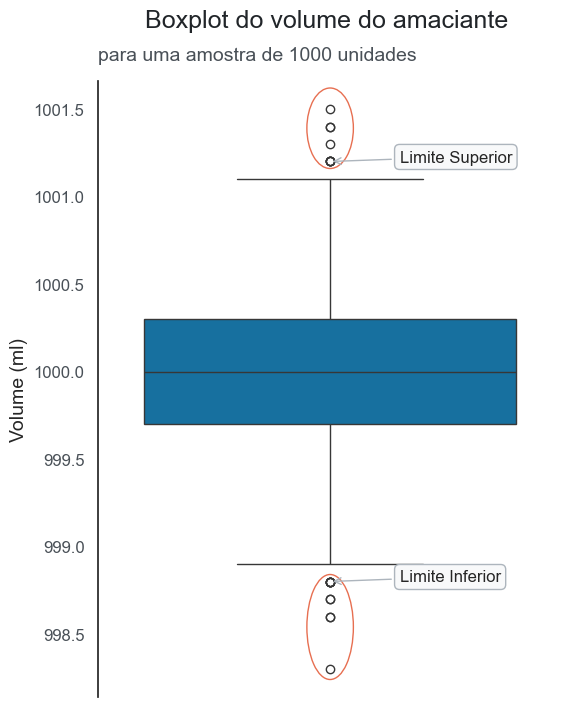

In [22]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

vol_amaciante = pd.read_csv("volume_amaciante.csv")
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante,y="Volume",orient = "v",color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# # Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

   
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))         
ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))      

plt.show()

## Aula 05 - Explorando padrões nos dados

### Desafio 1

Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras.

In [23]:
import pandas as pd

dados = pd.read_csv("notas.csv")
dados

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72
...,...,...
295,Turma 3,65
296,Turma 3,75
297,Turma 3,71
298,Turma 3,74


In [24]:

# Descobrir quantas turmas existem
turmas_unicas = dados['Turma'].nunique()

print(f'Número de turmas: {turmas_unicas}')


Número de turmas: 3


C:\Users\Diego\AppData\Local\Temp\ipykernel_27012\2669742377.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




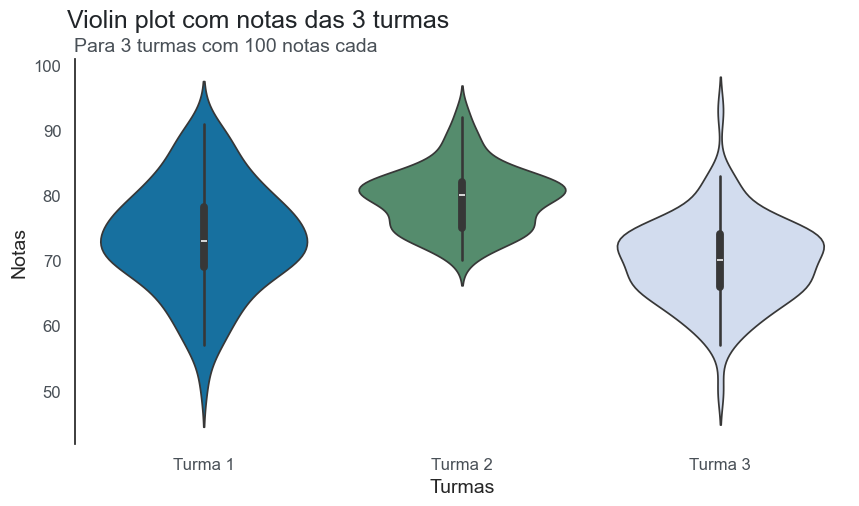

In [25]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, axs = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")

# Gerando o violinplot de comprimento, altura e largura
ax = sns.violinplot(data = dados, x = "Turma",y = "Nota", palette = [AZUL2, VERDE1, AZUL5])

## Personalizando o gráfico
plt.suptitle('Violin plot com notas das 3 turmas', size=18, color=CINZA1, ha = 'right')
plt.title('Para 3 turmas com 100 notas cada', fontsize=14, color=CINZA2,  loc = "left")
ax.set_xlabel('Turmas',  fontsize = 14)
ax.set_ylabel('Notas', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)     

plt.show()

### Desafio 2

 Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_medidas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_a = df_medidas.query("amostra == 'A'")[["comprimento", "largura"]]


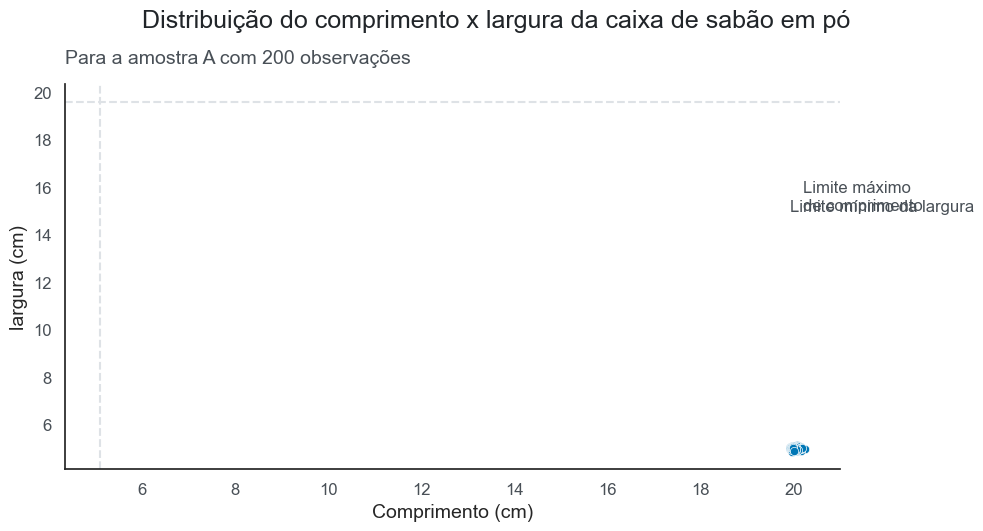

In [42]:
# Gerando a função que cria o gráfico de dispersão

def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.02):


    # Área do gráfico e tema da visualização
    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_theme(style="white")

    # Gerando o gráfico de dispersão
    ax = sns.scatterplot(data = df_a,x = "comprimento",y = "largura", color = map_cores)

    ## Personalizando o gráfico
    plt.suptitle('Distribuição do comprimento x largura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
    plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
    ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
    ax.set_ylabel('largura (cm)', fontsize = 14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    sns.despine()     

    # Desenhando a linha horizontal com o límite mínimo de largura desejado
    ax.text(19.92, 14.855, 'Limite mínimo da largura', fontsize=12, color = CINZA2, va = "bottom")
    plt.axhline(y = 15 * (1 - pct), xmin = 0, xmax = df_a["comprimento"].max(), color = CINZA4, linestyle='--')

    # Desenhando a linha vertical com o límite mínimo de comprimento desejado
    ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
    plt.axvline(x = 20 * (1 + pct), ymin = 0, ymax = df_a["largura"].max(), color = CINZA4, linestyle='--')

    return ax

ax = grafico_dispersao()

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
from matplotlib.patches import Ellipse
import numpy as np

# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01       
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a["comprimento"]]
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a["altura"]]
map_cores = np.where(rejeita_comp,cores[0],np.where(rejeita_alt,cores[1],cores[2]))




# # Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3)) 

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(-180, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()